### Visualizing the MST

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to calculate Manhattan distance
def manhattan_distance(point1, point2):
    """
    Computes the Manhattan distance between two points.

    :param point1: (x1, y1)
    :param point2: (x2, y2)
    :return: Manhattan distance
    """
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

# Function to read .out file
def read_out_file(file_path):
    """
    Reads the sinks, points, and edges from the .out file.

    :param file_path: path of output file
    :return: list of sinks, list of points, and list of edges
    """
    sinks = []
    points = []
    edges = []

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith("sink"):
                parts = line.split()
                id, x, y = int(parts[1]), float(parts[2]), float(parts[3])
                sinks.append((id, x, y))
            elif line.startswith("point"):
                parts = line.split()
                id, x, y = int(parts[1]), float(parts[2]), float(parts[3])
                points.append((id, x, y))
            elif line.startswith("edge"):
                parts = line.split()
                u, v = int(parts[1]), int(parts[2])
                edges.append((u, v))

    return sinks, points, edges

# Function to calculate edge weights for all edges
def calculate_edge_weights(edges, node_positions):
    """
    Calculates the edges weights using Manhattan distance for all edges

    :param edges: list of edges where each edge is a tuple (u, v)
    :param node_positions: dictionary that maps node IDs to its coordinates
    :return: list of sinks, list of points, and list of edges
    """
    edge_weights = {}
    for u, v in edges:
        x1, y1 = node_positions[u]
        x2, y2 = node_positions[v]
        weight = manhattan_distance((x1, y1), (x2, y2))
        edge_weights[(u, v)] = round(weight, 2) 
    return edge_weights

# Function that plots the graph
def plot_graph(sinks, points, edges):
    G = nx.Graph()

    # Add sinks and points as nodes
    node_positions = {}
    for id, x, y in sinks:
        G.add_node(id, pos=(x, y), type="sink")
        node_positions[id] = (x, y)
    for id, x, y in points:
        G.add_node(id, pos=(x, y), type="point")
        node_positions[id] = (x, y)

    # Add edges
    G.add_edges_from(edges)

    # Calculate edge weights
    edge_weights = calculate_edge_weights(edges, node_positions)

    # Get positions and labels
    pos = nx.get_node_attributes(G, 'pos')
    node_types = nx.get_node_attributes(G, 'type')

    # Plot the graph
    plt.figure(figsize=(8, 8))

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color="black", alpha=0.5)

    # Draw sinks and points with different colors
    sink_nodes = [n for n in G.nodes if node_types[n] == "sink"]
    point_nodes = [n for n in G.nodes if node_types[n] == "point"]

    nx.draw_networkx_nodes(G, pos, nodelist=sink_nodes, node_color="blue", label="Sinks", node_size=200)
    nx.draw_networkx_nodes(G, pos, nodelist=point_nodes, node_color="red", label="Points", node_size=200)

    # Draw labels for nodes
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Draw edge labels (weights)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_color="green", font_size=8)

    # Add legend
    plt.legend(scatterpoints=1, loc="best", fontsize=10)
    plt.title("Graph Visualization with Manhattan Edge Weights")
    plt.axis("equal")
    plt.show()

### Using the visualization code to plot some graphs

Sinks: [(8, 2.7, 2.1), (14, -2.9, -1.6), (7, -1.5, -3.8)]
Points: [(103, -1.5, -1.6), (1002, 2.7, -1.6)]
Edges: [(14, 103), (7, 103), (8, 1002), (103, 1002)]


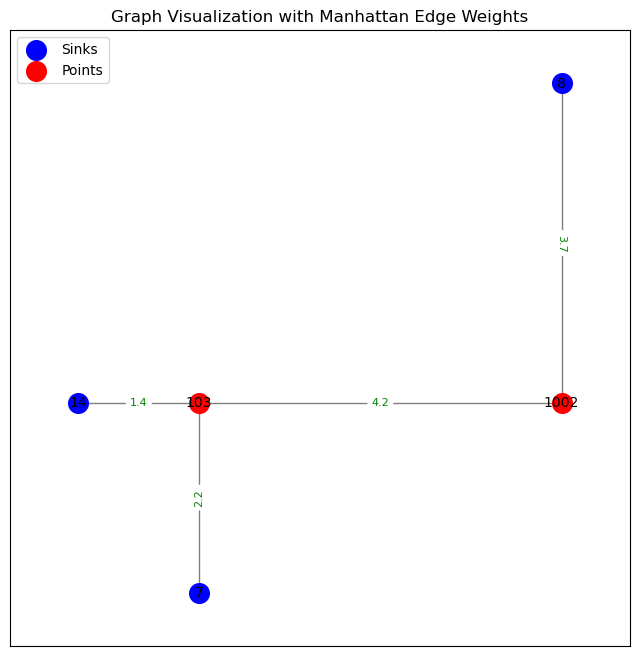

In [9]:
# File path to the .out file
file_path = "./data/r31.out"

# Read the .out file
sinks, points, edges = read_out_file(file_path)

# Print the parsed data
print(f"Sinks: {sinks}")
print(f"Points: {points}")
print(f"Edges: {edges}")

# Plot the graph
plot_graph(sinks, points, edges)

Sinks: [(3, 1.3, 1.0), (19, 1.0, -2.4), (4, 1.0, 1.7), (14, 2.2, 1.9)]
Points: [(101, 1.0, 1.0), (1002, 1.0, 1.9)]
Edges: [(4, 1002), (3, 101), (4, 101), (14, 1002), (19, 101)]


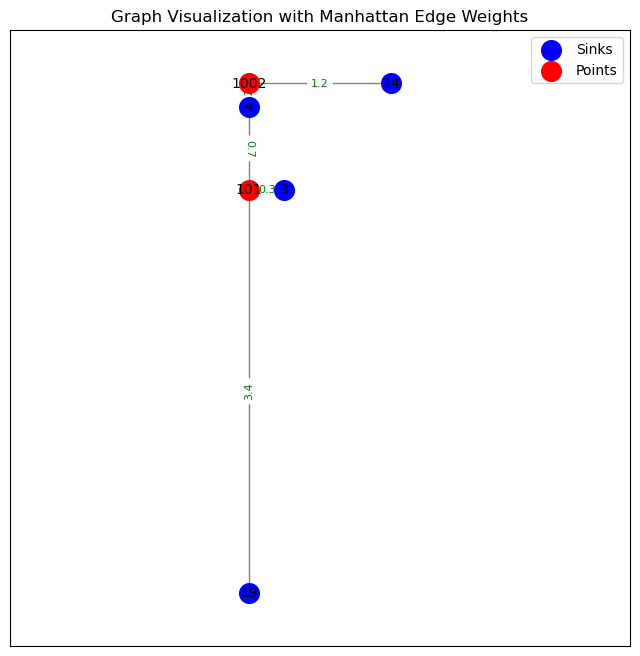

In [10]:
# File path to the .out file
file_path = "./data/r42.out"

# Read the .out file
sinks, points, edges = read_out_file(file_path)

# Print the parsed data
print(f"Sinks: {sinks}")
print(f"Points: {points}")
print(f"Edges: {edges}")

# Plot the graph
plot_graph(sinks, points, edges)